In [1]:
import numpy as np
import pandas as pd
import csv

import time

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import ExtraTreeClassifier

import lightgbm as lgb

from sklearn.metrics import accuracy_score, classification_report


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('dataset.csv')
# df.head()


# Extract the input features (all columns except the last one)
X = df.iloc[:, :-1].values
# Extract the labels (the last column)
y = df.iloc[:, -1].values



In [3]:
# Import the dataset for the folder

df = pd.read_csv('dataset.csv')


# Set the input and output variables:

# Extract the input features (all columns except the last one)
X = df.iloc[:, :-1].values

# Extract the labels (the last column)
y = df.iloc[:, -1].values

# Now X and y are ready to be used in your machine learning model


In [4]:
# Data analysis before the model building

classes = ['FOG', 'SOC', 'VS', 'WS', 'WF']

len(classes)

classes[4]

unique_classes, counts = np.unique(y, return_counts=True)
for unique_class, count in zip(unique_classes, counts):
    print(f'Class {unique_class}: {count} samples')

Class 0: 200 samples
Class 1: 200 samples
Class 2: 200 samples
Class 3: 200 samples
Class 4: 200 samples


In [5]:
# Data analysis before the model building

classes = ['FOG', 'SOC', 'VS', 'WS', 'WF']

# class 0 ---- FOG ---- FREEZING OF JOINTS
# class 1 ---- soc -----
# class 2 ---- VS ---- VOLINTERY STOP
# class 3 ---- WS ---- WALKING SLOW
# class 4 ---- WF ---- WAKING FAST 

# 

unique_classes, counts = np.unique(y, return_counts=True)
for unique_class, count in zip(unique_classes, counts):
    print(f'Class {unique_class}: {count} samples')


Class 0: 200 samples
Class 1: 200 samples
Class 2: 200 samples
Class 3: 200 samples
Class 4: 200 samples


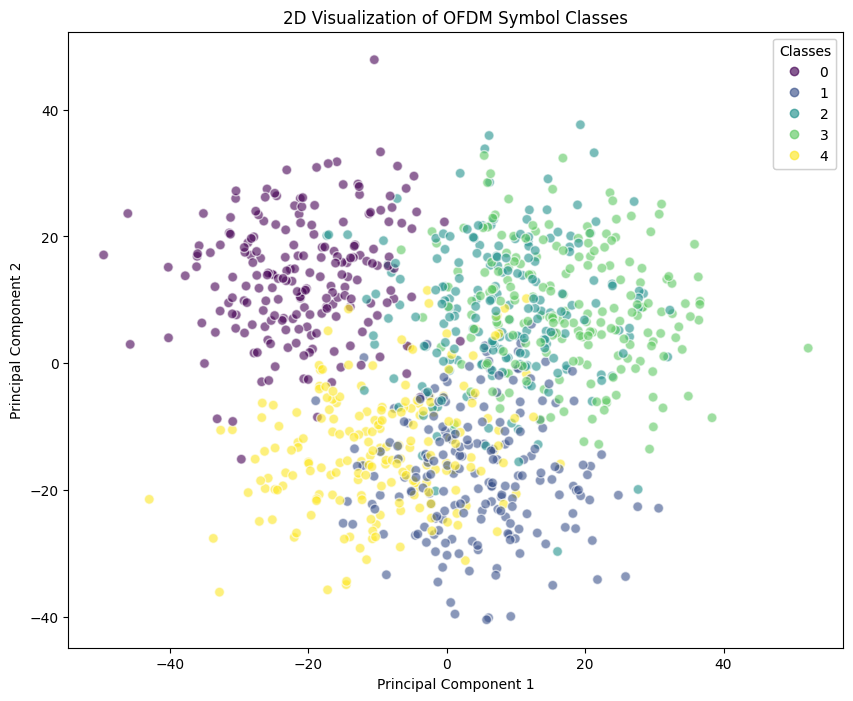

In [6]:
# Hear we want to display the sample. 
# It is usually difficult to display multi dimension system
# here we use single component to ddisplay the reslts


# Apply PCA and reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the reduced data
plt.figure(figsize=(10, 8))

scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', s=50, alpha=0.6, edgecolors='w')

# Add a legend for the classes
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of OFDM Symbol Classes')
plt.show()

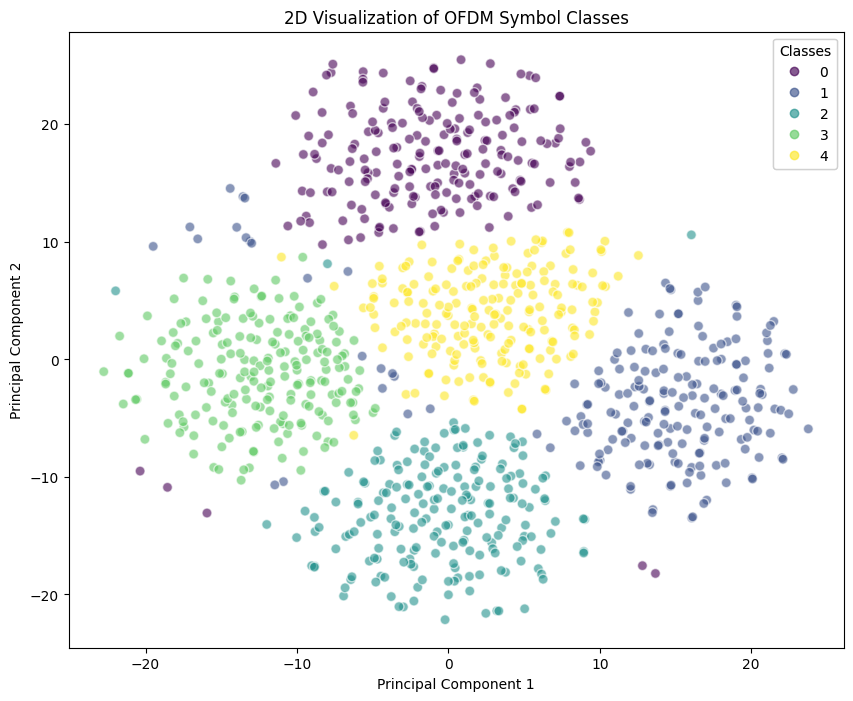

In [7]:
from sklearn.manifold import TSNE

# Apply t-SNE and reduce the data to 2 dimensions
tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X)


# Plot the reduced data
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', s=50, alpha=0.6, edgecolors='w')

# Add a legend for the classes
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of OFDM Symbol Classes')
plt.show()

In [8]:
# from here we can see that we can seperate the classes using process signal

X.max()
X.min()

-37.63461935162163

# Data PreProcess

In [9]:
Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

X.max()

1.0000000000000002

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape

(800, 200)

In [11]:
# min-max scaling

Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)
# Min-max scalling scale the data between [0,1] for comvenicne

# Split the data into test train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# out of 1000 samples, divided in 800 and 200

print(X_train.shape)
print(X_test.shape)

(800, 200)
(200, 200)


# Random Forest for FOG detection

In [12]:
clf = RandomForestClassifier(n_estimators=200)
clf

RandomForestClassifier(n_estimators=200)

In [13]:
clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)
y_pred, y_test

(array([2, 0, 2, 2, 0, 0, 1, 2, 1, 4, 2, 4, 1, 3, 4, 4, 3, 3, 4, 2, 4, 1,
        1, 1, 0, 2, 4, 1, 4, 0, 4, 3, 4, 3, 1, 1, 0, 2, 3, 4, 0, 4, 2, 1,
        3, 3, 3, 0, 1, 0, 1, 0, 4, 0, 1, 3, 0, 1, 3, 4, 2, 4, 1, 1, 2, 1,
        3, 4, 4, 4, 0, 2, 2, 3, 2, 3, 2, 0, 4, 1, 3, 1, 4, 2, 3, 4, 3, 0,
        4, 1, 3, 1, 2, 0, 0, 2, 3, 0, 0, 0, 1, 0, 3, 0, 2, 0, 1, 1, 1, 3,
        0, 4, 3, 0, 4, 0, 0, 4, 4, 4, 3, 4, 0, 0, 4, 3, 4, 1, 4, 3, 0, 2,
        3, 4, 1, 3, 1, 0, 1, 0, 0, 2, 1, 4, 1, 2, 2, 2, 1, 4, 2, 3, 0, 2,
        3, 3, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 4, 0, 2, 3, 3,
        1, 4, 1, 2, 3, 0, 2, 3, 4, 1, 2, 3, 4, 2, 4, 4, 1, 3, 3, 2, 1, 2,
        4, 2], dtype=int64),
 array([2, 4, 2, 2, 0, 0, 1, 2, 1, 0, 2, 1, 1, 3, 3, 1, 3, 1, 3, 2, 4, 4,
        1, 1, 0, 2, 4, 1, 4, 0, 4, 1, 4, 3, 1, 2, 2, 2, 3, 2, 0, 4, 4, 1,
        3, 3, 3, 0, 1, 4, 0, 0, 4, 1, 0, 3, 0, 1, 3, 4, 2, 4, 1, 3, 2, 1,
        3, 0, 4, 4, 1, 2, 2, 3, 2, 0, 0, 0, 4, 1, 0, 4, 4, 1, 3, 4, 3, 0,
        4

In [15]:
# Implementation of decision tree

# Create a Decision Tree classifier

clf = RandomForestClassifier()
#clf = DecisionTreeClassifier()



# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Accuracy: 74.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        42
           1       0.71      0.69      0.70        42
           2       0.73      0.75      0.74        36
           3       0.85      0.80      0.83        41
           4       0.72      0.72      0.72        39

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.74      0.75       200



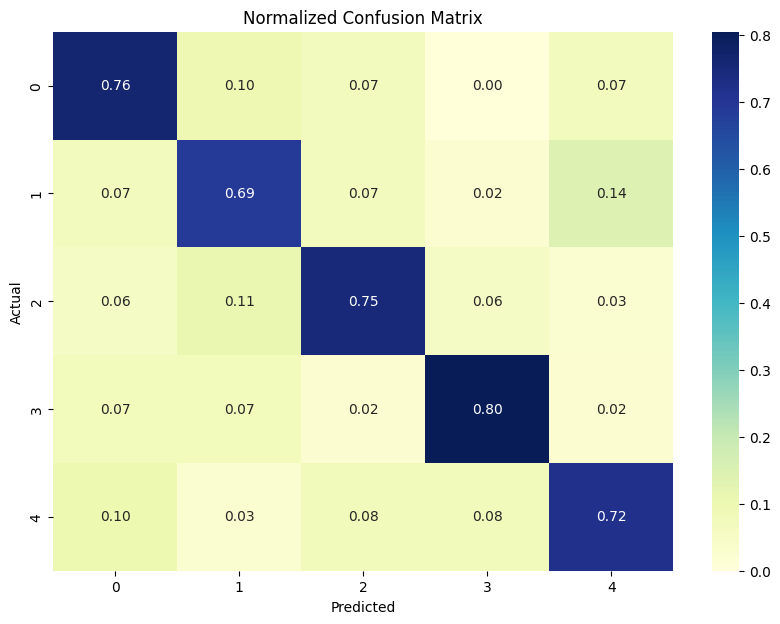

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix by row (i.e., by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Extra Trees for FOG

Accuracy: 93.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        39
           1       0.95      0.91      0.93        43
           2       1.00      0.97      0.98        31
           3       0.89      0.93      0.91        44
           4       0.95      0.91      0.93        43

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



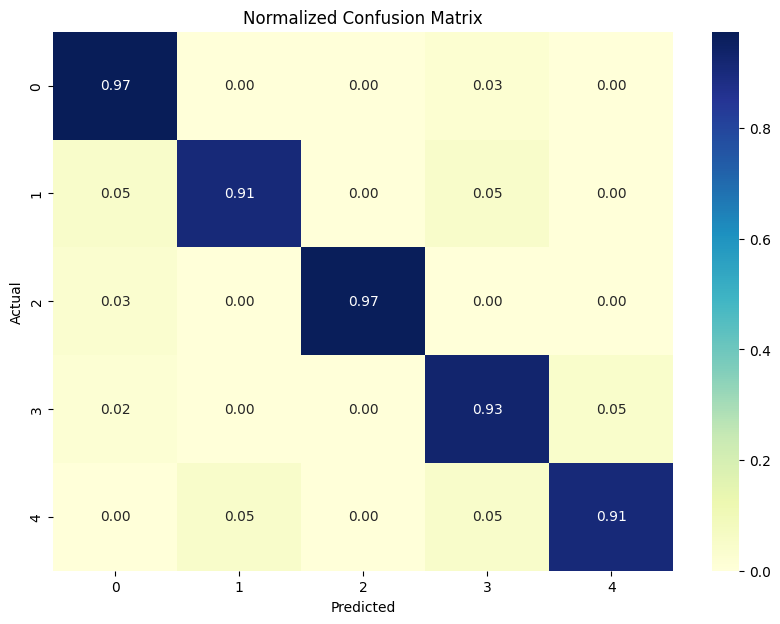

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an Extra Trees classifier
clf = ExtraTreesClassifier(n_estimators=300, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix by row
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [19]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical

# Create the model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax')) # 5 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 198, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 97, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 48, 128)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 6144)              0         
                                                                 
 dense (Dense)               (None, 128)               7

# CNN Model

In [20]:
df1 = pd.read_csv('dataset_1.csv')
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values


Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

In [27]:


# Reshape the input data to be suitable for Conv1D
X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)

# Convert the labels to one-hot encoding
lb = LabelBinarizer()
y_onehot = lb.fit_transform(y)
y_onehot = to_categorical(y, num_classes=5) # Assuming 5 classes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_onehot, test_size=0.2, random_state=1)

# Create the model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax')) # 5 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/20
50/50 [==============================] - 2s 18ms/step - loss: 1.6197 - accuracy: 0.2013 - val_loss: 1.6091 - val_accuracy: 0.2150
Epoch 2/20
50/50 [==============================] - 0s 9ms/step - loss: 1.6096 - accuracy: 0.1863 - val_loss: 1.6090 - val_accuracy: 0.2000
Epoch 3/20
50/50 [==============================] - 0s 9ms/step - loss: 1.6098 - accuracy: 0.2062 - val_loss: 1.6076 - val_accuracy: 0.2250
Epoch 4/20
50/50 [==============================] - 0s 9ms/step - loss: 1.6079 - accuracy: 0.2163 - val_loss: 1.6041 - val_accuracy: 0.2300
Epoch 5/20
50/50 [==============================] - 0s 9ms/step - loss: 1.5996 - accuracy: 0.2338 - val_loss: 1.5866 - val_accuracy: 0.3050
Epoch 6/20
50/50 [==============================] - 0s 9ms/step - loss: 1.5543 - accuracy: 0.3288 - val_loss: 1.4843 - val_accuracy: 0.4750
Epoch 7/20
50/50 [==============================] - 0s 8ms/step - loss: 1.3557 - accuracy: 0.4575 - val_loss: 1.3386 - val_accuracy: 0.4500
Epoch 8/20
50/50 [=

7/7 [==============================] - 0s 4ms/step
Accuracy: 77.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        40
           1       0.73      0.93      0.82        46
           2       0.75      0.82      0.79        40
           3       0.90      0.53      0.67        34
           4       0.70      0.70      0.70        40

    accuracy                           0.77       200
   macro avg       0.79      0.76      0.76       200
weighted avg       0.78      0.77      0.77       200



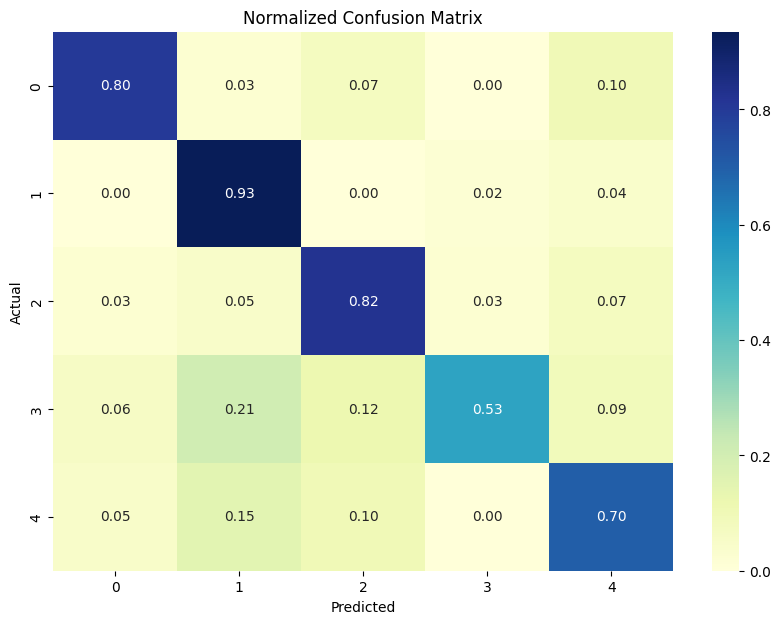

In [28]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix by row
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Deep neurl network

In [108]:
# Reshape the input data to be suitable for a DNN
X_flatten = X.reshape(X.shape[0], -1)

# Convert the labels to one-hot encoding
lb = LabelBinarizer()
y_onehot = lb.fit_transform(y)
y_onehot = to_categorical(y, num_classes=5) # Assuming 5 classes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y_onehot, test_size=0.2, random_state=1)

# Create the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax')) # 5 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/50
50/50 [==============================] - 1s 14ms/step - loss: 1.6131 - accuracy: 0.2050 - val_loss: 1.5995 - val_accuracy: 0.2500
Epoch 2/50
50/50 [==============================] - 0s 8ms/step - loss: 1.6022 - accuracy: 0.2500 - val_loss: 1.6045 - val_accuracy: 0.2350
Epoch 3/50
50/50 [==============================] - 0s 7ms/step - loss: 1.5999 - accuracy: 0.2288 - val_loss: 1.5739 - val_accuracy: 0.3400
Epoch 4/50
50/50 [==============================] - 0s 8ms/step - loss: 1.5504 - accuracy: 0.2887 - val_loss: 1.5256 - val_accuracy: 0.2100
Epoch 5/50
50/50 [==============================] - 0s 7ms/step - loss: 1.5133 - accuracy: 0.3150 - val_loss: 1.4337 - val_accuracy: 0.3750
Epoch 6/50
50/50 [==============================] - 0s 8ms/step - loss: 1.3039 - accuracy: 0.4725 - val_loss: 1.2405 - val_accuracy: 0.4350
Epoch 7/50
50/50 [==============================] - 0s 7ms/step - loss: 1.0947 - accuracy: 0.5587 - val_loss: 1.3616 - val_accuracy: 0.4450
Epoch 8/50
50/50 [=

7/7 [==============================] - 0s 2ms/step
Accuracy: 85.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        37
           1       0.83      0.95      0.89        42
           2       1.00      0.51      0.68        41
           3       0.81      0.97      0.89        36
           4       0.82      0.95      0.88        44

    accuracy                           0.85       200
   macro avg       0.87      0.86      0.85       200
weighted avg       0.87      0.85      0.84       200



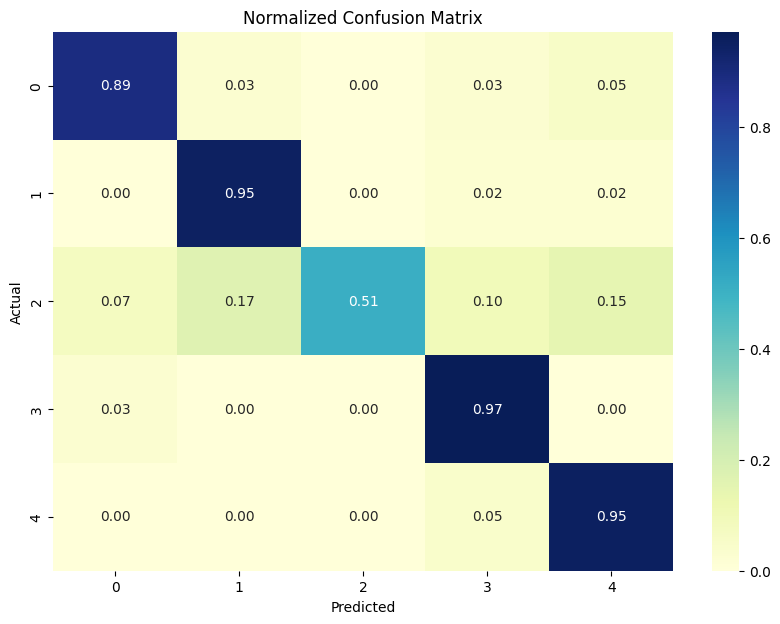

In [109]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix by row
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# DGRU CODE FOR FOG DETECTION

In [ ]:
from tensorflow.keras.layers import GRU
# Assume X is already shaped as (samples, timesteps, features)
# Convert the labels to one-hot encoding
lb = LabelBinarizer()
y_onehot = lb.fit_transform(y)
y_onehot = to_categorical(y, num_classes=5) # Assuming 5 classes

# Assuming X is 2D and you want to treat each feature as a timestep
X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)

# Now you can split your reshaped data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_onehot, test_size=0.2, random_state=1)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=1)

# Create the model
model = Sequential()
model.add(GRU(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(128, activation='relu'))
#model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax')) # 5 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# whale optimisation code for feature selection for RF model.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def initialize_population(pop_size, dimensions, bounds):
    return bounds[0] + (bounds[1] - bounds[0]) * np.random.rand(pop_size, dimensions)

def WOA(objective_function, dimensions, bounds, pop_size, max_iter):
    # Initialize population
    population = initialize_population(pop_size, dimensions, bounds)
    fitness = np.apply_along_axis(objective_function, 1, population)
    best_idx = np.argmin(fitness)
    best_position = population[best_idx]
    best_fitness = fitness[best_idx]

    # Main loop
    a = 2
    for iteration in range(max_iter):
        a = 2 - 2 * iteration / max_iter
        for i in range(pop_size):
            r1 = np.random.rand()
            r2 = np.random.rand()
            A = 2 * a * r1 - a
            C = 2 * r2

            # Encircling prey
            D = np.abs(C * best_position - population[i])
            X1 = best_position - A * D

            # Bubble-net attacking
            if np.random.rand() < 0.5:
                if np.abs(A) < 1:
                    population[i] = X1
                else:
                    k = np.random.randint(pop_size)
                    Dk = np.abs(C * population[k] - population[i])
                    X2 = population[k] - A * Dk
                    population[i] = X2

            # Update fitness
            new_fitness = objective_function(population[i])
            if new_fitness < fitness[i]:
                fitness[i] = new_fitness
                if new_fitness < best_fitness:
                    best_fitness = new_fitness
                    best_position = population[i]

    return best_position, best_fitness

# Read the dataset
file_path = 'dataset.csv'
df = pd.read_csv(file_path)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function to optimize
def objective_function(features_selected):
    features_selected = [bool(round(i)) for i in features_selected]
    X_train_selected = X_train.loc[:, features_selected]
    X_test_selected = X_test.loc[:, features_selected]
    
    # Train the Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_selected, y_train)
    predictions = clf.predict(X_test_selected)
    
    # Use accuracy as the optimization criterion
    # and penalize solutions that use too many features
    return -(accuracy_score(y_test, predictions) - 0.01 * sum(features_selected))

# Set the parameters for WOA
dimensions = X.shape[1]
bounds = [0, 1]
pop_size = 30
max_iter = 100

# Run WOA
best_features, best_score = WOA(objective_function, dimensions, bounds, pop_size, max_iter)

# Use best features for final classification
best_features = [bool(round(i)) for i in best_features]
X_train_selected = X_train.loc[:, best_features]
X_test_selected = X_test.loc[:, best_features]

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_selected, y_train)
predictions = clf.predict(X_test_selected)

final_accuracy = accuracy_score(y_test, predictions)
print("Final Accuracy with Optimal Features:", final_accuracy)



# Resusive feature elimination using Random forest:



In [140]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset


data = pd.read_csv('dataset.csv')
X = data.drop('label', axis=1) # Assuming 'target' is the name of the class label column
y = data['label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply MinMax scaling
scaler = MinMaxScaler()  # Step 2: Create an instance of the scaler
X_train = scaler.fit_transform(X_train)  # Fit the scaler to the training data and transform X_train
X_test = scaler.transform(X_test)  # Transform X_test

# Note: After scaling, X_train and X_test are now NumPy arrays. Convert them back to DataFrame for the subsequent code to work
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# In original paper K-fold cross validation is applied and here for simpliclty just sample code is applied for feature elemination
def evaluate_features(features, X_train, y_train, X_test, y_test):
    # Train and evaluate the performance of the feature subset
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train[features], y_train)
    predictions = clf.predict(X_test[features])
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# RFE function using Random Forest
def exhaustive_RFE_RF(X_train, y_train, X_test, y_test):
    best_accuracy = 0
    best_feature_set = []
    all_features = list(X_train.columns)
    
    for n in range(1, len(all_features) + 1):
        current_feature_set = all_features[:n]
        
        accuracy = evaluate_features(current_feature_set, X_train, y_train, X_test, y_test)
        print(f"Evaluating with {n} features: Accuracy = {accuracy:.2f}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature_set = current_feature_set
            
    return best_feature_set, best_accuracy

best_features, best_accuracy = exhaustive_RFE_RF(X_train, y_train, X_test, y_test)

print(f"Best feature set ({len(best_features)} features): {best_features}")
print(f"Best accuracy: {best_accuracy:.2f}")

Evaluating with 1 features: Accuracy = 0.24
Evaluating with 2 features: Accuracy = 0.23
Evaluating with 3 features: Accuracy = 0.32
Evaluating with 4 features: Accuracy = 0.36
Evaluating with 5 features: Accuracy = 0.36
Evaluating with 6 features: Accuracy = 0.34
Evaluating with 7 features: Accuracy = 0.33
Evaluating with 8 features: Accuracy = 0.36
Evaluating with 9 features: Accuracy = 0.41
Evaluating with 10 features: Accuracy = 0.38
Evaluating with 11 features: Accuracy = 0.42
Evaluating with 12 features: Accuracy = 0.41
Evaluating with 13 features: Accuracy = 0.36
Evaluating with 14 features: Accuracy = 0.46
Evaluating with 15 features: Accuracy = 0.49
Evaluating with 16 features: Accuracy = 0.47
Evaluating with 17 features: Accuracy = 0.44
Evaluating with 18 features: Accuracy = 0.45
Evaluating with 19 features: Accuracy = 0.49
Evaluating with 20 features: Accuracy = 0.50
Evaluating with 21 features: Accuracy = 0.52
Evaluating with 22 features: Accuracy = 0.54
Evaluating with 23 

In [141]:
# ... Previous code ...

from sklearn.feature_selection import SelectFromModel

# Use the 100 best features determined from the previous step
X_train_reduced = X_train[best_features]
X_test_reduced = X_test[best_features]

# Initialize a Random Forest Classifier
#clf = RandomForestClassifier(n_estimators=500)
clf = ExtraTreesClassifier(n_estimators=500, random_state=42)
clf.fit(X_train_reduced, y_train)

# Use SelectFromModel for feature selection
selector = SelectFromModel(clf, prefit=True)

# Transform training and test datasets to retain only the important features
X_train_transformed = selector.transform(X_train_reduced)
X_test_transformed = selector.transform(X_test_reduced)

# Get the retained feature names
selected_feature_names = np.array(best_features)[selector.get_support()]

print(f"Number of selected features from the best 100 features: {X_train_transformed.shape[1]}")
print(f"Selected features: {selected_feature_names}")

# For demonstration, train the Random Forest on these selected features and test accuracy
clf.fit(X_train_transformed, y_train)
predictions = clf.predict(X_test_transformed)
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy after further refining features: {accuracy:.2f}")



c:\Users\ahsan\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\ahsan\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Number of selected features from the best 100 features: 85
Selected features: ['1' '2' '3' '6' '7' '10' '15' '17' '18' '20' '23' '24' '27' '28' '33'
 '34' '36' '38' '40' '42' '44' '48' '50' '53' '55' '56' '61' '62' '64'
 '66' '68' '69' '74' '78' '79' '80' '83' '84' '87' '90' '92' '93' '95'
 '96' '97' '99' '100' '102' '103' '106' '108' '109' '111' '116' '121'
 '122' '123' '125' '129' '130' '131' '133' '136' '138' '141' '142' '144'
 '147' '148' '149' '150' '153' '154' '155' '156' '157' '160' '161' '162'
 '164' '165' '166' '167' '176' '178']
Accuracy after further refining features: 0.86


# Code for Extra tree using selected features

In [142]:
# Train ExtraTreesClassifier using the selected features
extra_trees = ExtraTreesClassifier(n_estimators=300, random_state=42)
extra_trees.fit(X_train_transformed, y_train)
predictions = extra_trees.predict(X_test_transformed)
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy with Extra Trees after training on features selected by RandomForest: {accuracy:.2f}")


Accuracy with Extra Trees after training on features selected by RandomForest: 0.85


# Code for LGBM AFTER FEATURE SELECTION

In [ ]:

from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Define a grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'max_depth': [-1, 10, 20, 30],  # -1 means no limit
    'num_leaves': [31, 50, 100, 150],  # should be less than 2^(max_depth)
    'min_split_gain': [0.0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the LGBM classifier
lgbm = LGBMClassifier()

# Use GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(lgbm, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_transformed, y_train)

# Get the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Highest accuracy found: ", grid_search.best_score_)

# Use the best model to predict
best_lgbm = grid_search.best_estimator_
predictions = best_lgbm.predict(X_test_transformed)
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy with LightGBM after hyperparameter tuning: {accuracy:.2f}")


# CNN MODEL 

In [145]:
X_reduced = X[selected_feature_names]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils.np_utils import to_categorical

# Reshape the input data to be suitable for Conv1D
X_reshaped = X_reduced.values.reshape(X_reduced.shape[0], X_reduced.shape[1], 1)

# Convert the labels to one-hot encoding
lb = LabelBinarizer()
y_onehot = lb.fit_transform(y)
y_onehot = to_categorical(y, num_classes=5)  # Assuming 5 classes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_onehot, test_size=0.2, random_state=1)

# Create the model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # 5 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/20
50/50 [==============================] - 2s 15ms/step - loss: 1.7138 - accuracy: 0.2825 - val_loss: 1.3954 - val_accuracy: 0.4250
Epoch 2/20
50/50 [==============================] - 0s 8ms/step - loss: 1.2791 - accuracy: 0.4712 - val_loss: 1.1816 - val_accuracy: 0.4800
Epoch 3/20
50/50 [==============================] - 0s 8ms/step - loss: 0.9828 - accuracy: 0.6275 - val_loss: 0.7837 - val_accuracy: 0.7100
Epoch 4/20
50/50 [==============================] - 0s 8ms/step - loss: 0.7337 - accuracy: 0.7350 - val_loss: 0.6928 - val_accuracy: 0.7600
Epoch 5/20
50/50 [==============================] - 0s 7ms/step - loss: 0.4658 - accuracy: 0.8438 - val_loss: 0.7213 - val_accuracy: 0.7600
Epoch 6/20
50/50 [==============================] - 0s 8ms/step - loss: 0.3262 - accuracy: 0.8825 - val_loss: 0.5860 - val_accuracy: 0.8050
Epoch 7/20
50/50 [==============================] - 0s 8ms/step - loss: 0.2137 - accuracy: 0.9200 - val_loss: 0.6351 - val_accuracy: 0.7750
Epoch 8/20
50/50 [=

# DNN

In [149]:
# ... Previous code ...

# Subset of features determined by RandomForest and SelectFromModel
X_reduced = X[selected_feature_names]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical

# Reshape the input data to be suitable for a DNN
X_flatten = X_reduced.values.reshape(X_reduced.shape[0], -1)

# Convert the labels to one-hot encoding
lb = LabelBinarizer()
y_onehot = lb.fit_transform(y)
y_onehot = to_categorical(y, num_classes=5)  # Assuming 5 classes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y_onehot, test_size=0.2, random_state=1)

# Create the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))  # 5 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/200
50/50 [==============================] - 1s 16ms/step - loss: 1.9190 - accuracy: 0.3000 - val_loss: 1.4424 - val_accuracy: 0.4000
Epoch 2/200
50/50 [==============================] - 0s 7ms/step - loss: 1.2430 - accuracy: 0.4825 - val_loss: 1.1151 - val_accuracy: 0.5650
Epoch 3/200
50/50 [==============================] - 0s 7ms/step - loss: 0.8816 - accuracy: 0.6550 - val_loss: 0.9387 - val_accuracy: 0.6450
Epoch 4/200
50/50 [==============================] - 0s 8ms/step - loss: 0.6628 - accuracy: 0.7387 - val_loss: 0.8031 - val_accuracy: 0.7050
Epoch 5/200
50/50 [==============================] - 0s 7ms/step - loss: 0.4577 - accuracy: 0.8350 - val_loss: 0.7725 - val_accuracy: 0.7700
Epoch 6/200
50/50 [==============================] - 0s 7ms/step - loss: 0.3316 - accuracy: 0.8875 - val_loss: 0.8208 - val_accuracy: 0.7650
Epoch 7/200
50/50 [==============================] - 0s 7ms/step - loss: 0.2134 - accuracy: 0.9325 - val_loss: 0.6596 - val_accuracy: 0.8100
Epoch 8/200


# Load pre-trained model for results

In [22]:
df1 = pd.read_csv('reduced_dataset.csv')
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values


Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

X_flatten = X.reshape(X.shape[0], -1)

# Convert the labels to one-hot encoding
lb = LabelBinarizer()
y_onehot = lb.fit_transform(y)
y_onehot = to_categorical(y, num_classes=5) # Assuming 5 classes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y_onehot, test_size=0.2, random_state=1)


In [23]:
from keras.models import load_model


# CNN
cnn = load_model('CNN_Best.h5')

# DNN
dnn = load_model('DNN_Best.h5')

# DGRU

dgru = load_model('DGRU_Best.h5')

# cnn best

7/7 [==============================] - 1s 1ms/step
Accuracy: 90.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        45
           1       0.89      1.00      0.94        39
           2       1.00      0.74      0.85        39
           3       0.74      1.00      0.85        35
           4       1.00      0.81      0.89        42

    accuracy                           0.90       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.92      0.90      0.90       200



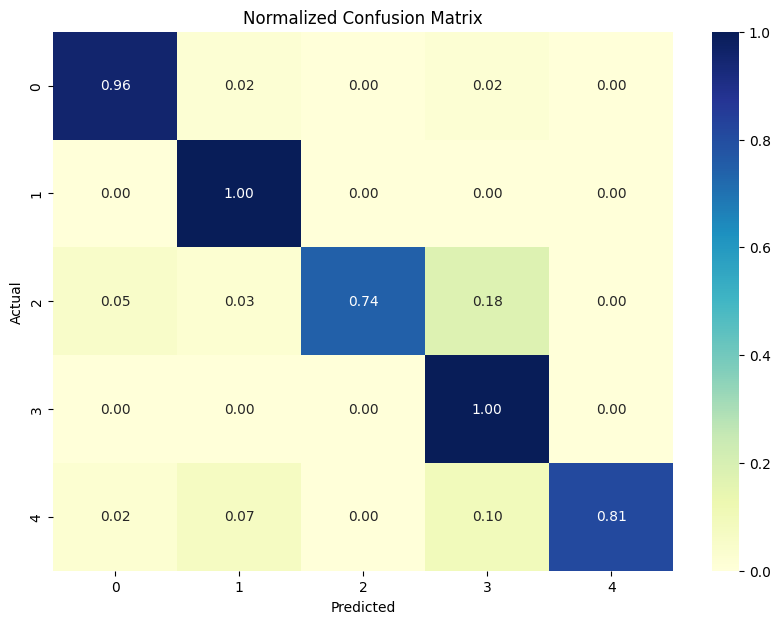

In [24]:
# Make predictions on the testing data
y_pred = cnn.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix by row
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# DNN

In [25]:
# Make predictions on the testing data
y_pred = dnn.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)



7/7 [==============================] - 0s 3ms/step


7/7 [==============================] - 0s 4ms/step
Accuracy: 96.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.90      0.95        39
           2       0.93      0.97      0.95        39
           3       0.90      1.00      0.95        35
           4       1.00      0.93      0.96        42

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



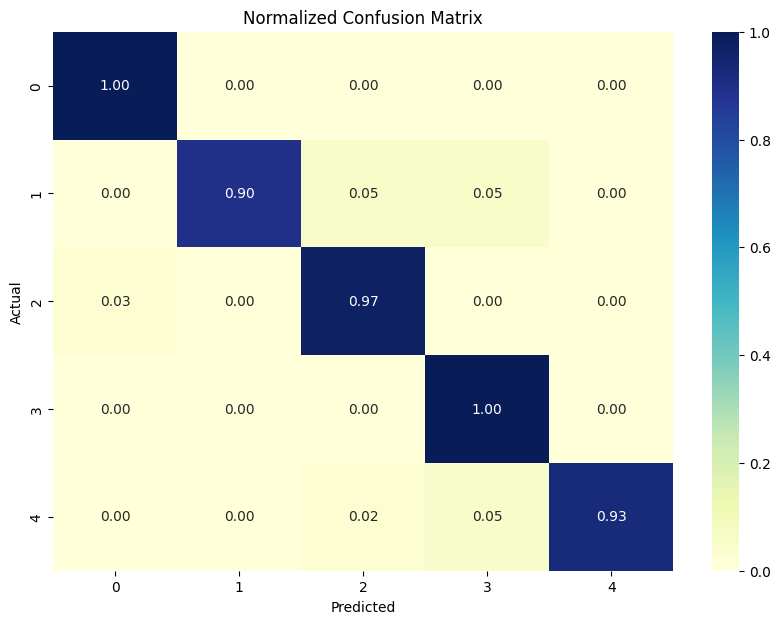

In [26]:
# Make predictions on the testing data
y_pred = dnn.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
#y_test = np.argmax(y_test, axis=1)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix by row
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# DGRU

7/7 [==============================] - 0s 3ms/step
Accuracy: 98.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        45
           1       1.00      1.00      1.00        39
           2       1.00      0.92      0.96        39
           3       1.00      0.97      0.99        35
           4       0.98      1.00      0.99        42

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



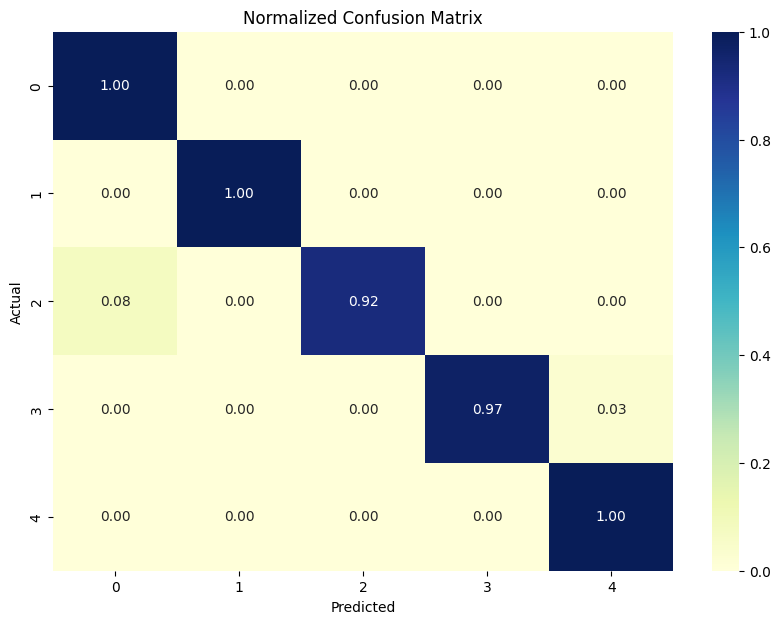

In [27]:
# Make predictions on the testing data
y_pred = dgru.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
#y_test = np.argmax(y_test, axis=1)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix by row
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()